In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from xhistogram.xarray import histogram
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf

## Load WBT Data

In [3]:
# Load max data
ds_2085_max = xr.open_dataset('../data/processed/wbt.2085-2095.max')
ds_1980_max = xr.open_dataset('../data/processed/wbt.1980-1990.max')

# Load mean data
ds_2085_mean = xr.open_dataset('../data/processed/wbt.2085-2095.mean')
ds_1980_mean = xr.open_dataset('../data/processed/wbt.1980-1990.mean')

# Load min data
ds_2085_min = xr.open_dataset('../data/processed/wbt.2085-2095.min')
ds_1980_min = xr.open_dataset('../data/processed/wbt.1980-1990.min')

# Load area data
land_area = xr.open_dataset('../data/processed/wbt.land_area')
land_mask = np.isfinite(land_area)
# Replace NaN with 0 
land_area_adj = land_area.where(land_mask,0).rename({'__xarray_dataarray_variable__':'land_area'})

## Plot Regions

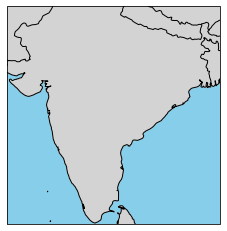

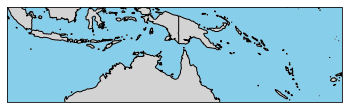

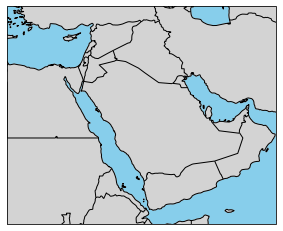

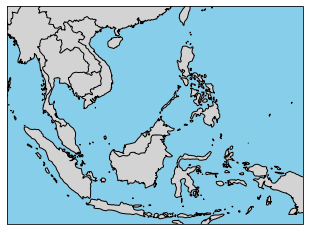

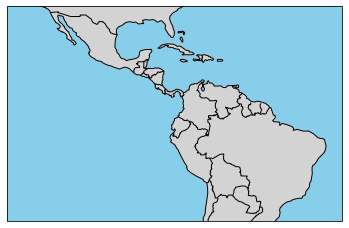

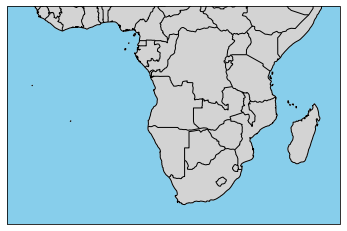

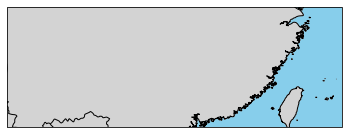

In [16]:
regions = ['India','Northern Oceania','Middle East','Southeast Asia','South-Central America','Southern Africa','Southern China']
for region in regions:
    mf.map_region(region)

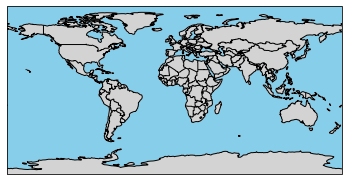

In [34]:
mf.map_region('Global')

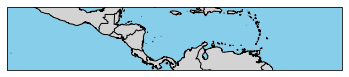

In [66]:
mf.map_region('Central America')

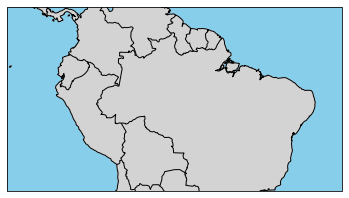

In [68]:
mf.map_region('Northern South America')

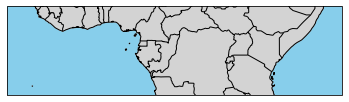

In [70]:
mf.map_region('Central Africa')

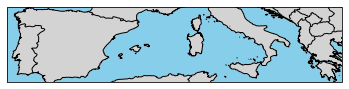

In [80]:
mf.map_region('Southern Europe')

## Ensemble Histograms

In [57]:
def ensemble_hist(region,upper=40,lower=-20,numbins=60):
    fig, ax = plt.subplots()
    mf.hist(ds_2085_max,land_area_adj,region,ax,lower=lower,numbins=numbins)
    for i in range(0,5):
        ds_ens = ds_2085_max.isel(ensemble=i)
        mf.hist(ds_ens,land_area_adj.isel(ensemble=0),region,ax,denom=10,lower=lower,numbins=numbins)
    ax.set_xlabel('WBT (Celsius)')
    ax.set_ylabel('Average Frequency (Days Per Year)')
    ax.set_title(region+': Ensemble Distributions of Max Daily WBT, 2085-95')
    ax.legend(['Average','Member 1', 'Member 2', 'Member 3', 'Member 4', 'Member 5'], loc='upper left') 
    fig.savefig(region+'_ensemble_hist.png')

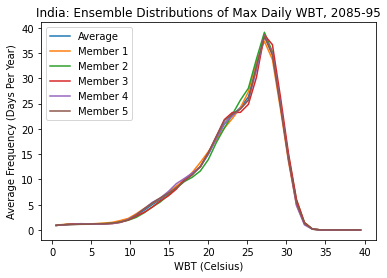

In [60]:
ensemble_hist('India',lower=0,numbins=40)

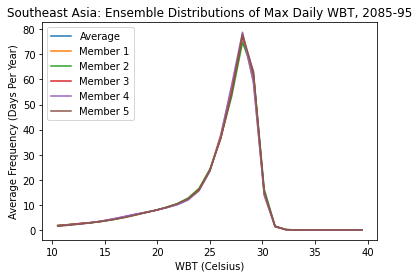

In [61]:
ensemble_hist('Southeast Asia',lower=10,numbins=30)

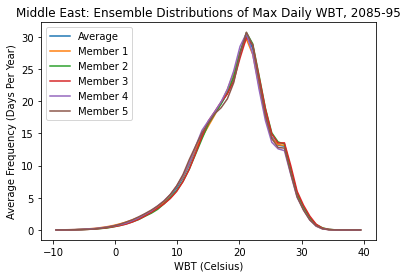

In [62]:
ensemble_hist('Middle East',lower=-10,numbins=50)

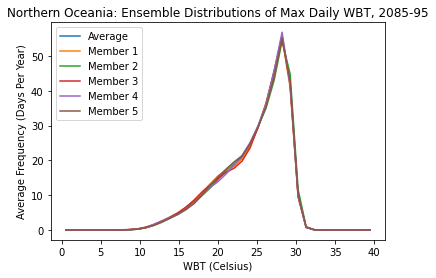

In [58]:
ensemble_hist('Northern Oceania',lower=0,numbins=40)

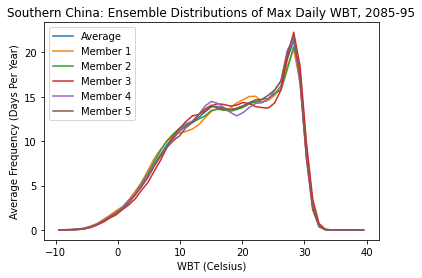

In [63]:
ensemble_hist('Southern China',lower=-10,numbins=50)

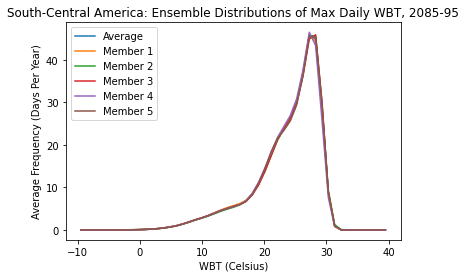

In [64]:
ensemble_hist('South-Central America',lower=-10,numbins=50)

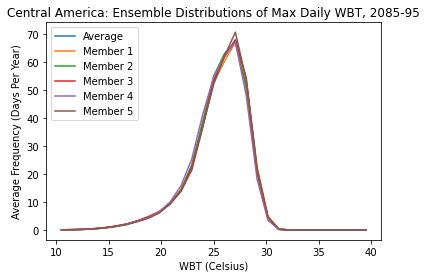

In [69]:
ensemble_hist('Central America',lower=10,numbins=30)

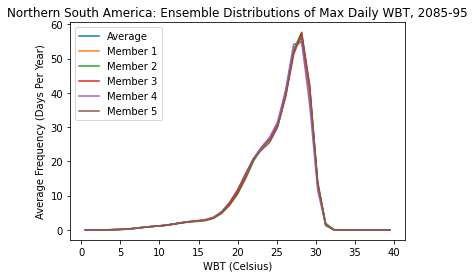

In [72]:
ensemble_hist('Northern South America',lower=0,numbins=40)

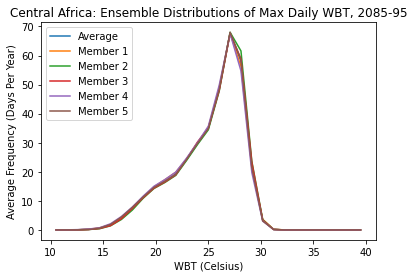

In [76]:
ensemble_hist('Central Africa',lower=10,numbins=30)

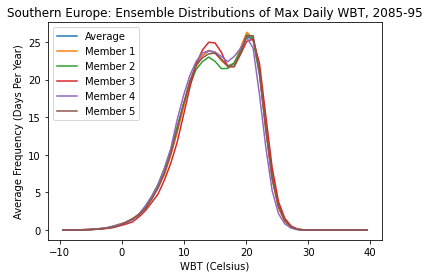

In [81]:
ensemble_hist('Southern Europe',lower=-10,numbins=50)

## Side-by-Side Max WBT

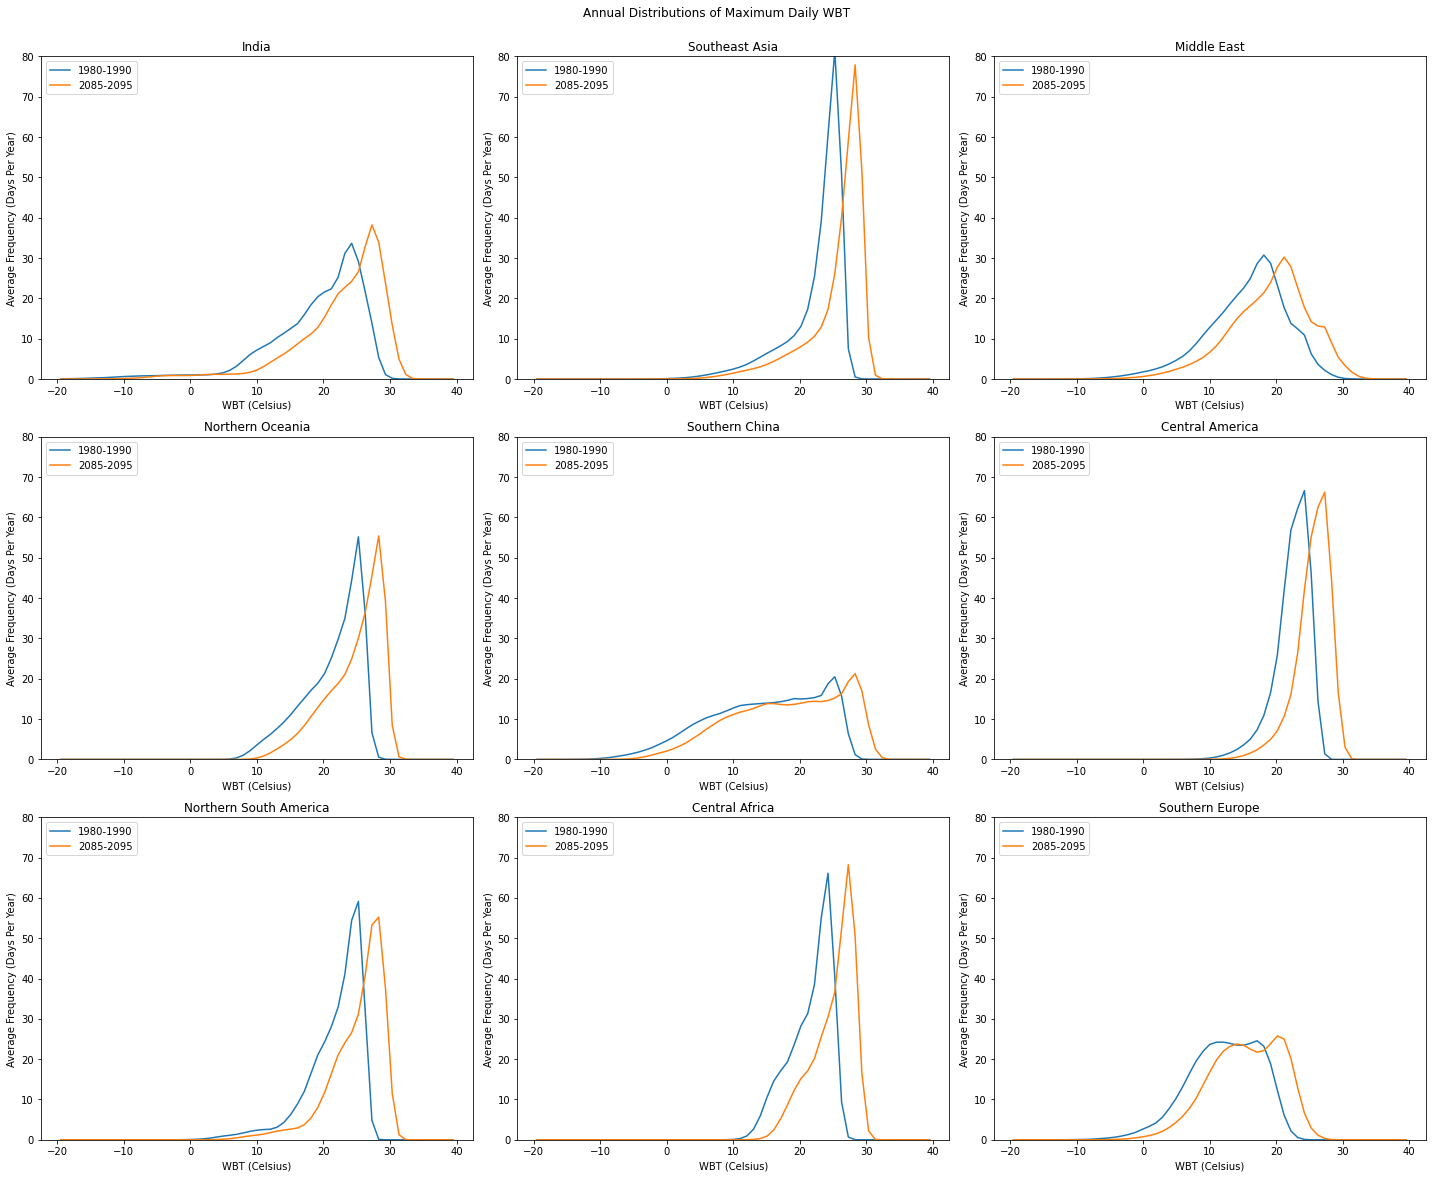

In [83]:
regions = ['India','Southeast Asia','Middle East','Northern Oceania','Southern China','Central America','Northern South America','Central Africa','Southern Europe']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,16),nrows=3,ncols=3)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    mf.hist(ds_1980_max,land_area_adj,region,ax)
    mf.hist(ds_2085_max,land_area_adj,region,ax)
    ax.set_xlabel('WBT (Celsius)')
    ax.set_ylabel('Average Frequency (Days Per Year)')
    ax.set_ylim(0,80)
    ax.set_title(region)
    ax.legend(['1980-1990','2085-2095'], loc='upper left')
    
fig.suptitle('Annual Distributions of Maximum Daily WBT',y=1.02)
plt.tight_layout()
fig.savefig('maxwbthist.png')